<h1><center>Laboratorio 9: Los huesos de Hipócrates 🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Vanessa Gaete
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `https://github.com/VanessaGaete/Laboratorio-de-Ciencia-de-Datos.`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Creación de clasificadores de imagenes a traves de redes Fully connected y CNN.
- Uso de Dataloaders para la carga de datasets.
- Comparación de Fully Connected y red convolucional.

## Reglas:

- Fecha de entrega: 17/11/2022
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Creación de modelos de clasificación de imágenes utilizando Pytorch.
- Creación de dataloader y aplicar transformaciones sobre el dataset.
- Comprender la diferencia entre una CNN y una Fully Connected.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones de `Pytorch`, la cual, está enfocada para proyectos de Deep Learning.


# Importamos librerias utiles 😸

Comenzamos importando librerías utiles para la ejecución del laboratorio:

In [24]:
import os
import time
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, models
from torchvision import transforms as T

# Identificando los Huesos de Hipócrates🔎

<p align="center">
  <img src="https://i.pinimg.com/originals/d8/58/66/d85866cd1cc3979f94526551addf74b4.gif" width="300">
</p>

Tras el éxito que han tenido proponiendo modelos de machine learning en trabajos anteriores, el famoso medico Hipócrates se ha contactado con ustedes para solicitarles ayuda para automatizar la identificación de radiografías de partes humanas. Para esto, les señala que le gustaría utilizar algoritmos de deep learning producto que Demócrito le señalo que resultan la mejor alternativa para la predicción de imágenes.

En su conversación con el medico usted le comenta que ha tenido algunas clases relacionadas a Deep Learning, por esto, están motivados en abordar el problema utilizando redes Fully Connected y redes convolucionales con Pytorch. Sin embargo, al anunciarle los tipos de redes que conocen, el filósofo les comenta que no había escuchado muy buenos resultados por parte de las CNN, por lo que les pide que comprueben a traves de la métrica de accuracy que tipo de redes es mejor para la tarea de identificación de radiografías. ¿Será cierto lo que dice el filósofo?, Veámoslo en un nuevo capítulo de los Laboratorios de Programación Científica para Ciencia de Datos!

## 1.1 Creación de Lista de Archivos

<p align="center">
  <img src="https://media.tenor.com/BJ-9w-MUVCMAAAAM/tis100-sad.gif" width="300">
</p>


Comience revisando de forma manual cada una de las imágenes que posee la carpeta subida a material docente. Verifique la cantidad de tipos de radiografías que se tienen y la cantidad de imágenes que dispone cada carpeta.

Revisado el contenido de las imágenes, utilice `os.listdir` para crear un `numpy.array` o un `Dataframe` que contenga las imágenes y un label que señale al tipo de radiografía a la que hace referencia la imagen. Para hacer las etiquetas codifique el tipo de imágenes en números que vayan del 0 al total de tipos de radiografías, no utilice strings para codificar las etiquetas.

**Ejemplo de Estructura:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-0lax">image_path</th>
    <th class="tg-0lax">label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">image1</td>
    <td class="tg-0lax">1</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">image2</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">image3</td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">image4</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">image5</td>
    <td class="tg-0lax">4</td>
  </tr>
</tbody>
</table>

In [25]:
# Código Aquí
data = pd.DataFrame(columns=["image_path", "label"])
image_paths = []
labels = []
ruta_carpeta = r'/Users/vanessagaete/Downloads/Medical-MNIST'
for i, category in enumerate(os.listdir(ruta_carpeta)):
    print("Número" + str(i) + " : " + str(category))
    for image in os.listdir(ruta_carpeta+ "/"+ category):
    #print(i)
    #print(category)
        image_path = ruta_carpeta+ "/"+ category + "/"+ image
        image_paths.append(image_path)
        labels.append(i)
        
data["image_path"] = image_paths
data["label"] = labels
data
        

Número0 : Hand
Número1 : BreastMRI
Número2 : ChestCT
Número3 : HeadCT
Número4 : AbdomenCT
Número5 : CXR


,image_path,label
0,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
1,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
2,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
3,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
4,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
...,...,...
58949,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
58950,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
58951,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
58952,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5


## 1.2 Creación de Dataset

Tomando en cuenta la estructura de datos desarrollada en el punto 1.1, construya la clase `MedicalDataset()` que cumpla los siguientes puntos:

- [ ] Poseer un `__init__` en el que se almacene `estructura` creada en 1.1, la `raiz` de la carpeta y una función que permita transformar el dataset (de esto no se preocupe mucho, ya que solamente debe almacenar una función en el atributo).
- [ ] La clase debe ser capaz de entregar la cantidad de elementos a traves de `__len__`.
- [ ] Debe poseer el método `__getitem__` que retorne una tupla con la imagen y su correspondiente etiqueta.

In [26]:
# Código Aquí
class MedicalDataset(Dataset):
    def __init__(self, estructura, raiz, transform):
        self.estructura = estructura
        self.raiz = raiz
        self.transform = transform
    
    def __getitem__(self, i):
        
        #for image_path in data["label"]:
        #    print(image_path)
        
        img_path = self.estructura.loc[i,"image_path"]
        
        # Un poco de ayuda para cargar la imagen
        image = Image.open(img_path).convert('RGB')
        
        df_mask = self.estructura['image_path']== img_path
        filtered_df = self.estructura[df_mask]
        label = filtered_df.to_numpy()[0][1]
        
        # Auida para realizar la transformación
        if self.transform:
            image = self.transform(image)
        
        return (image, label)
    
    def __len__(self):
        return len(self.estructura)


## 1.3 Prueba del MedicalDataset

Con la clase construida en el punto 1.2, verifique su funcionamiento cargando el dataset y realizando las transformaciones que entrega la función `transform_image`. Compruebe a través de un ejemplo las transformaciones aplicadas en la imagen, comentando la función que cumple `MedicalDataset` y si es posible observar todas las transformaciones aplicadas con la función `transform_image`.

- [ ] Probar la clase MedicalDataset y aplicando una transformación de "train"
- [ ] Plotear un ejemplo del MedicalDataset.

**Función para transformar las imagenes:**

In [27]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([T.Resize(size = (256,256)),
                T.RandomRotation(degrees = (-20,+20)),
                T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        Tr_img = T.Compose([T.Resize(size = (224,224)), T.ToTensor()]) 

    return Tr_img

**Código para obtener un ejemplo:**

In [28]:
# Prueba del dataset
dataset = MedicalDataset(data, ruta_carpeta, transform_image("train"))

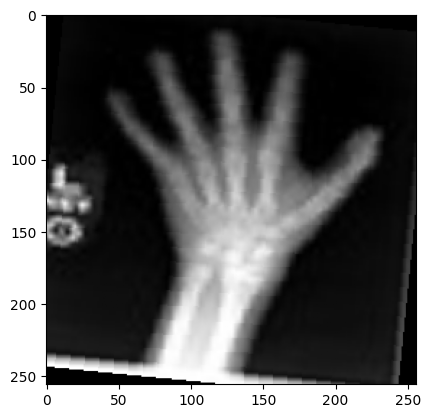

In [29]:
data_test= iter(dataset)
example_image = next(data_test)

# Utilice plotly para plotear un ejemplo
plt.imshow(example_image[0].squeeze().permute(1,2,0), cmap ="gray") 
plt.show()

> La clase permite acceder a los elementos del dataset y aplicarles transformaciones de manera simple. La transformcion rota un poco la imagen y la agranda.

## 1.4 Creación de Clasificadores

<p align="center">
  <img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif" width="300">
</p>

A continuación, deben construir tres clasificadores con los que deberán verificar cuál de las arquitecturas posee un mejor desempeño para la tarea de clasificación de imágenes. Para la construcción considere los siguientes puntos:

- [ ] Señale cual es el objetivo del `forward` en este tipo de redes, sea breve para su explicación.
- [ ] Construir una red Fully Connected para solucionar el problema de clasificación. Para esta parte se le aconseja que rellene el esqueleto dispuesto más abajo y que lleva el nombre de `FCClassifier`, en el deberá rellenar con la dimensión de las capas ocultas y verificar cual será el tamaño de la entrada.
- [ ] Construya una red convolucional **simple** (no más de una capa convolucional) para la tarea de clasificación de imágenes, para esto basen su código en la clase del día `09-11-2022`.
- [ ] Crear una red convolucional más compleja. Para esta parte tienen completa libertad en la construcción de su red, lo único que debe cumplir es que sea convolucional.

**Esqueletos Propuestos:**

Forward se encarga de hacer las predicciones sobre los hiperparámetros de la red.

In [30]:
class FCClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FCClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.lin1 = nn.Linear(in_channels, 128)
        self.relu_1 = nn.ReLU()
        self.lin2 = nn.Linear(128, num_classes)
        
    def forward(self, x):
        out = self.flatten(x)
        out = self.lin1(out)
        out = self.relu_1(out)
        out = self.lin2(out)
        # noten que al optimizar con CrossEntropyLoss no necesitamos que la salida sea probabilidad.
        # es decir, no necesitamos poner un softmax previo a la salida
        return out

        return x

In [31]:
class CNNClassifier1(nn.Module):
    def __init__(self):
        super(CNNClassifier1, self).__init__()
        self.layer1 = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc1 = nn.Linear(in_features=32 * 6 * 6, out_features=6)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.fc1(out)

        return out
    
#Para este clasificador me base en uno que trabajaba con imagenes en
#internet y lo modifiqué a las dimensiones que estoy utilizando en el lab.
class CNNClassifier2(nn.Module):
    def __init__(self):
        super(CNNClassifier2, self).__init__()
        self.layer = nn.Sequential(

                                nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.MaxPool2d(2,2),

                                nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.MaxPool2d(2,2),

                                nn.Flatten(),
                                nn.Linear(82944,1024),
                                nn.ReLU(),
                                nn.Linear(1024, 512),
                                nn.ReLU(),
                                nn.Linear(512,6)
                            )
    def forward(self, x):
        return self.layer(x)

## 1.5 Separando Datos para el Entrenamiento

<p align="center">
  <img src="https://c.tenor.com/Esn7Jif-ZLQAAAAC/separate-square.gif" width="200">
</p>

Utilizando un Holdout a su gusto, separe los datos en un conjunto de entrenamiento y de testing. Aplique las transformaciones correspondientes usando `transform_image` para cada conjunto de datos y utilice `torch.utils.data.DataLoader` para crear un objeto iterable del dataset.

- [ ] Definir el Holdout a utilizar.
- [ ] Separar los datos en un conjunto de entrenamiento y prueba.
- [ ] Aplicar las transformaciones correspondientes en cada uno de los dataset.
- [ ] Utilizar `DataLoader` de pytorch sobre los dataset.

In [32]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([T.Resize(size = (64,64)),
                T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        Tr_img = T.Compose([T.Resize(size = (64,64)), T.ToTensor()]) 

    return Tr_img

In [33]:
# Separar Datos de Entrenamiento
from sklearn.model_selection import train_test_split 

features = data.drop(columns=["label"])
labels = data.loc[:, "label"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.33, shuffle=True, stratify=labels
)

train=pd.DataFrame()
train["image_path"] = X_train
train["label"] = y_train
train.reset_index(inplace=True, drop=True)
display(train)

test=pd.DataFrame()
test["image_path"] = X_test
test["label"] = y_test
test.reset_index(inplace=True, drop=True)
display(test)

train_set = MedicalDataset(train, ruta_carpeta, transform_image("train"))
test_set = MedicalDataset(test, ruta_carpeta, transform_image("test"))


,image_path,label
0,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
1,/Users/vanessagaete/Downloads/Medical-MNIST/He...,3
2,/Users/vanessagaete/Downloads/Medical-MNIST/Br...,1
3,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
4,/Users/vanessagaete/Downloads/Medical-MNIST/Ha...,0
...,...,...
39494,/Users/vanessagaete/Downloads/Medical-MNIST/Ch...,2
39495,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
39496,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
39497,/Users/vanessagaete/Downloads/Medical-MNIST/He...,3


,image_path,label
0,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
1,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
2,/Users/vanessagaete/Downloads/Medical-MNIST/Br...,1
3,/Users/vanessagaete/Downloads/Medical-MNIST/He...,3
4,/Users/vanessagaete/Downloads/Medical-MNIST/He...,3
...,...,...
19450,/Users/vanessagaete/Downloads/Medical-MNIST/Ch...,2
19451,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
19452,/Users/vanessagaete/Downloads/Medical-MNIST/CX...,5
19453,/Users/vanessagaete/Downloads/Medical-MNIST/Ch...,2


In [34]:
# Uso de torch.utils.data.DataLoader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)


## 1.6 Creación de Funciones de Entrenamiento y Evaluación

<p align="center">
  <img src="https://www.researchgate.net/publication/319535615/figure/fig3/AS:536187598065664@1504848493070/A-typical-convolutional-neural-network-CNN-Architecture-for-Medical-Image-Classification.png" width="500">
</p>


Ya construido todas las funciones y clases necesarias llego el momento más importante... probar la red. Para esta sección, ustedes deberán ser capaces de definir los hiperparámetros de la red, definir las funciones de perdida a utilizar, señalar el optimizador a usar y finalmente crear sus funciones para el entrenamiento y prueba. Para realizar esta parte más estructurada, seguir los siguientes puntos de forma secuencial:

- [ ] Especifique los Hiperparámetros de las 3 redes. Para esta parte sea claro de su elección y señale el porqué de sus elecciones (o sea justifique el setting de sus hiperparámetros).
- [ ] Defina los modelos a utilizar, el optimizador que utilizará para el modelo y señale la función de perdida que utilizará.
- [ ] Explique de forma breve la función que cumplen los pasos `Backward` y `Descenso del gradiente` en una red neuronal.
- [ ] Cree una función llamado `train` que entrene a los clasificadores. Para esto, recuerde que estos modelos suelen utilizar un número de épocas, por lo que deberá generar un proceso iterativo de entrenamiento. Es importante que su función imprima las `loss` obtenidas por el modelo en cada época (si gusta puede almacenar estas losses en una lista para luego graficarlas y comparar).
- [ ] Diseñe una función para evaluar el desempeño de las redes. Para evaluar las redes utilice solamente la métrica accuracy (para esto se le recomienda comparar la predicción con el ground truth)

In [35]:
# Especificar hyperparámetros de las redes
in_channels_fc = 3 * 64 * 64
in_channels_cnn = 3
num_classes = 6
lr = 0.001
batch_size = 150
n_epochs = 10


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [36]:
# Red 1
model_fc = FCClassifier(in_channels_fc,num_classes)
model_fc.to(device)

# Red 2
cnn1 = CNNClassifier1()
cnn1.to(device)

# Red 3
cnn2 = CNNClassifier2()
cnn2.to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model_fc.parameters(), lr=0.001)
optimizer2 = torch.optim.Adam(cnn1.parameters(), lr=0.001)
optimizer3 = torch.optim.Adam(cnn2.parameters(), lr=0.001)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
# train
def train(model, train_loader, num_epochs, optimizer):
    # Lists for knowing classwise accuracy
    for e in range(num_epochs):
        for images, labels in train_loader:
            inputs = images.to(device)
            labels = labels.to(device)
            
            
            # zero the parameter gradients
            optimizer.zero_grad()
            #Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            #Backward
            loss.backward()
            
            # Descenso del gradiente
            optimizer.step()

# Evaluate
def evaluate(loader, model):
    predictions_list = []
    labels_list = []
    # Lists for visualization of loss and accuracy
    loss_list = []
    iteration_list = []
    accuracy_list = []
    
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0

        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            labels_list.append(labels)

            outputs = model(test)

            predictions = torch.max(outputs, 1)[1].to(device)
            predictions_list.append(predictions)
            correct += (predictions == labels).sum()

            total += len(labels)

        accuracy = correct * 100 / total
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        
        print(accuracy)
        confusion_matrix(labels_l, predictions_l)
        print(
            "Classification report for CNN :\n%s\n"
            % (classification_report(labels_l, predictions_l))
        )
 
train(model_fc, train_loader, n_epochs, optimizer1)
evaluate(model_fc, train_loader)

KeyboardInterrupt: 

## 1.7 Comparación de Resultados

<p align="center">
  <img src="https://media2.giphy.com/media/icJA0VF7ntoEL18Jez/giphy.gif"  width="200">
</p>

Construidas las funciones de entrenamiento y evaluación, entrene a las redes que construyo y compare los resultados obtenidos con todas las redes señalando cual posee mejor rendimiento. Comente una diferencia entre las redes Fully Connected y CNN podría generar un mejor desempeño en una u otra en la tarea de clasificación de imágenes.

- [ ] Entrenar las redes.
- [ ] Evaluar las redes.
- [ ] Comentar los resultados obtenidos y visualizar si existe una diferencia significativa en el rendimiento debido a la naturaleza de la red.

No pude probar las redes porque se queda pegado infinitamente en entrenar/evaluar y no se por qué :( incluso probe con pocas epocas

In [ ]:
# Código aquí
train(cnn1, train_loader, 50, optimizer2)
evaluate(cnn1, train_loader)

In [ ]:
# Código aquí
train(cnn2, train_loader, 50, optimizer3)
evaluate(cnn2, train_loader)

> Comente los resultados

# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/vKSR-ZakVMIAAAAC/pochitadancing-pochita.gif">
</p>